In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics

In [138]:
data: pd.DataFrame = pd.read_csv("../elden_ring_steam_reviews.csv")
data

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,134238864,english,being killed over and over again is fun,2023-03-07 14:19:11,True,0,0,False,False,False,47,2,355,355,346,2023-03-07 14:29:21
1,134238208,english,I write this review as I have 100% completed E...,2023-03-07 14:03:24,True,0,0,True,False,False,110,2,24238,5823,24238,2023-03-07 02:08:22
2,134238033,english,Fun,2023-03-07 13:59:13,True,0,0,True,False,False,11,1,912,912,881,2023-03-07 14:30:07
3,134237508,english,pretty cool.,2023-03-07 13:46:37,True,0,0,True,False,False,94,8,8497,2914,8497,2023-03-07 13:44:52
4,134236511,english,AMAZINGGGGGGGGGGGGG,2023-03-07 13:20:04,True,0,0,True,False,False,4,1,985,163,923,2023-03-07 14:26:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,131803069,english,Best platformer of the year.,2023-01-29 14:50:25,True,0,0,True,False,False,112,8,12095,1751,7565,2023-03-06 13:54:32
9790,131802918,english,"truly fun...very recommended, worth the money ...",2023-01-29 14:47:55,True,0,0,True,False,False,17,4,9467,39,8394,2023-02-26 17:51:52
9791,131802717,english,mimic is the friend we made along the way,2023-01-29 14:44:41,True,0,0,True,False,False,34,3,8098,6,5655,2023-02-23 10:17:41
9792,131802309,english,"The lands of Elden Ring are vast and wild, fil...",2023-01-29 14:38:38,True,1,0,True,False,False,70,8,9472,201,9191,2023-03-05 13:39:17


In [139]:
from sklearn.calibration import LabelEncoder
import sklearn.preprocessing as preprocessing


encoder = preprocessing.LabelEncoder()
data["review"].fillna("empty", inplace=True)
for column in data.columns:
    if data[column].dtype == 'object':
    # Примените кодирование только к колонкам с типом 'object' (строки)
        data[column] = encoder.fit_transform(data[column])

del data["id"]
del data["steam_purchase"]
del data["language"]
del data["written_during_early_access"]

In [140]:
def transformator(x): 
    if x >= 100 * 60: return 2
    elif x >= 58 * 60: return 1
    return 0

data["author_completed_100"] = data["author_playtime_at_review"].apply(transformator, True).to_frame()

C:\Users\Farukh\AppData\Local\Temp\ipykernel_21784\814310370.py:6: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  data["author_completed_100"] = data["author_playtime_at_review"].apply(transformator, True).to_frame()


<Axes: xlabel='author_completed_100'>

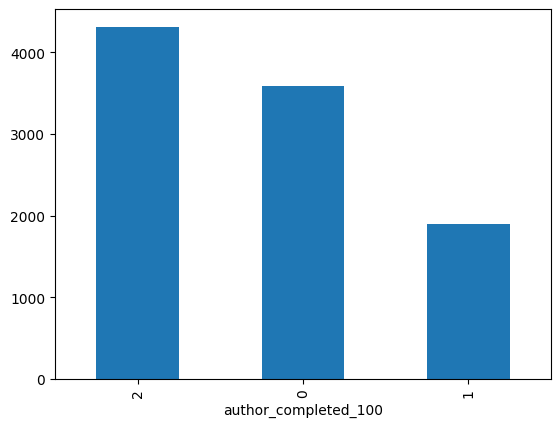

In [141]:
ser = data["author_completed_100"].value_counts()
ser.plot.bar()

In [142]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data["author_playtime_at_review"], data["author_completed_100"], train_size=0.8, shuffle=True, random_state=271)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
print(f"x_train {x_train.shape}, y_train {y_train.shape}")
print(f"x_test {x_test.shape}, y_test {y_test.shape}")

x_train (7835, 1), y_train (7835,)
x_test (1959, 1), y_test (1959,)


In [143]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import ensemble


In [144]:
x_samples = []
y_samples = []

x_values = data["author_playtime_at_review"].values
y_values = data["author_completed_100"].values

length = len(x_values)

for i in range(1, 10):
    start_slice = int(length / (i + 1))
    end_slice = int(length / i)
    x_samples.append(x_values[start_slice:end_slice])
    y_samples.append(y_values[start_slice:end_slice])

In [146]:
models = []
for i in range(9) :
    model_tree = tree.DecisionTreeClassifier(max_depth=8, random_state=1)
    model_tree.fit(x_samples[i].reshape(-1, 1), y_samples[i])
    models.append(model_tree)

In [ ]:
y_preds = []
for i in range(9):
    y_pred = (models.predict(x_values.reshape(-1, 1)))
plt.xlabel("x")
plt.ylabel("y")
for i in range(9):
    plt.scatter(x_values.reshape(-1, 1), y)